# Assignment 3
Author: Kamila Makhambetova

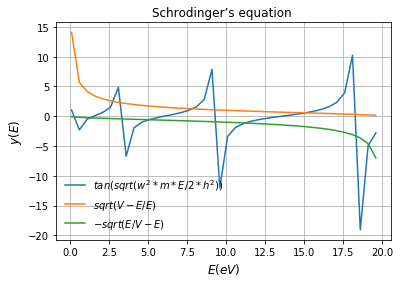

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import math

def f1 (E):
    #w in m
    w=10**(-9)
    m=9.1094*(10**-31)
    # h in J*s
    h1=1.0545*(10**-34)
    # h in eV*s
    h2=6.5821*(10**-16)
    x=(w*w*m*E)/(2*h1*h2)
    f1=np.tan(np.sqrt(x))
    return f1

def f2 (E):
    V=20
    f2=np.sqrt((V-E)/E)
    return f2

def f3 (E):
    V=20
    f3=-np.sqrt(E/(V-E))
    return f3

x=np.arange(0.1,19.9,0.5)
plt.plot(x,f1(x),label=r'$tan(sqrt(w^2*m*E/2*h^2))$')
plt.plot(x,f2(x),label=r'$sqrt(V-E/E)$')
plt.plot(x,f3(x),label=r'$-sqrt(E/V-E)$')
plt.legend(loc='lower left',fontsize='10',frameon=False)
plt.xlabel(r'$E (eV)$',size=12)
plt.ylabel(r'$y(E)$',size=12)
plt.title('Schrodinger’s equation ')
plt.grid()
plt.show()

#As the  Schrodinger’s equation starts from n=0 (even), we look at the intersection of orange and blue graphs.
#They intersect on [2.4,3] interval approximately at x=2.7 eV. Then we look at intersection of green and blue 
#graphs as n=1 (odd). They intersect on [3.1,3.6] interval approximately at x=3.2 eV. Continue in such way.
#at n=2 interval is [7,8], x=7.7
#at n=3 interval is [9,9.75], x=9.5
#at n=4 interval is [13.75,15.3], x=15.1
#at n=5 interval is [19,19.75], x=19.1


In [73]:
import numpy as np
import matplotlib.pyplot as plt
import math

def f1 (E):
    #w in m
    w=10**(-9)
    m=9.1094*(10**-31)
    # h in J*s
    h1=1.0545*(10**-34)
    # h in eV*s
    h2=6.5821*(10**-16)
    x=(w*w*m*E)/(2*h1*h2)
    f1=np.tan(np.sqrt(x))
    return f1

def f2 (E):
    V=20
    f2=np.sqrt((V-E)/E)
    return f2

def f3 (E):
    V=20
    f3=-np.sqrt(E/(V-E))
    return f3

def even(E):
    return f1(E)-f2(E)

def odd(E):
    return f1(E)-f3(E)

def falspos(x,f,tol):
    x1=x[0]
    x2=x[1]
    tol1=100
    i=0
    if (f(x1) * f(x2) >= 0): 
        print("You have not assumed right interval i.e. x1 and x2") 
        return -1
    while(tol1>tol):
        xr1 = x2-(f(x2)*(x2-x1))/(f(x2)-f(x1))
        fxr1 = f(xr1)
        if (fxr1==0):
             return xr1, x1, x2
        elif (f(x1)*f(xr1)<0):
            tol1=np.abs(xr1-x1)
            x2 = xr1
        else:
            tol1=np.abs(xr1-x2)
            x1 = xr1
        i=i+1
    print(f'The root is found at x={xr1} eV in {i} iteration(s)')
    return xr1, i

x=[[2.4,3],[3.1,3.6],[7,8],[9,9.75],[13.75,15.3],[19,19.75]]

def findroots(arr,maxiter):
    root=np.empty(6,dtype=float)
    Niter=np.empty(6,dtype=int)
    i=0
    while (i<maxiter):
        if(i%2==0):
            root[i],Niter[i] =falspos(x[i],even,0.001)
        else:
            root[i], Niter[i]=falspos(x[i],odd,0.001)
        i=i+1
    return root, Niter
 
root1=np.empty(6,dtype=float)
Niter1=np.empty(6,dtype=int)    
root1,Niter1=findroots(x,6)
#print(root1,Niter1)



The root is found at x=2.8508365383121337 eV in 25 iteration(s)
The root is found at x=3.3832281565641664 eV in 21 iteration(s)
The root is found at x=7.8493331374847655 eV in 15 iteration(s)
The root is found at x=9.40103450446307 eV in 319 iteration(s)
The root is found at x=15.06966701613919 eV in 11 iteration(s)
The root is found at x=19.133508356102784 eV in 16 iteration(s)
[ 2.85083654  3.38322816  7.84933314  9.4010345  15.06966702 19.13350836] [ 25  21  15 319  11  16]


In [68]:
x=[[2.4,3.0],[3.1,3.6],[7.0,8.0],[9.0,9.75],[13.75,15.3],[19.0,19.75],float]
root1=np.empty(6,dtype=float)
Niter1=np.empty(6,dtype=int)    
root1,Niter1=findroots(x,6)
  
print('\033[1m'+'\n Table 1: Energy at different quantum state')
print('\n {:7} {:15} {:11} {:10} \033[0m'.format('n','En (eV)','Niter','[El,Er]'))
i=0
while i<6:
    print(f'{i:2} {root1[i]:15.9f} {Niter1[i]:10}       {x[i]}')
    i=i+1 

The root is found at x=2.8508365383121337 eV in 25 iteration(s)
The root is found at x=3.3832281565641664 eV in 21 iteration(s)
The root is found at x=7.8493331374847655 eV in 15 iteration(s)
The root is found at x=9.40103450446307 eV in 319 iteration(s)
The root is found at x=15.06966701613919 eV in 11 iteration(s)
The root is found at x=19.133508356102784 eV in 16 iteration(s)

 Table 1: Energy at different quantum state

 n       En (eV)         Niter       [El,Er]    
 0     2.850836538         25       [2.4, 3.0]
 1     3.383228157         21       [3.1, 3.6]
 2     7.849333137         15       [7.0, 8.0]
 3     9.401034504        319       [9.0, 9.75]
 4    15.069667016         11       [13.75, 15.3]
 5    19.133508356         16       [19.0, 19.75]
